## Regression Model

In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 18.9 MB/s eta 0:00:000m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]━━━━━ 2/3 [scikit-learn]


In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 18.6 MB/s eta 0:00:0031m129.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 21.1 MB/s eta 0:00:003 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]━━━━━━━━━━ 5/7 [matplotlib]


In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

import seaborn as sns

In [11]:
data = pd.read_csv("../data/train_housing.csv")

In [12]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [1]:
data

NameError: name 'data' is not defined

In [14]:
data["SalePrice"].mean()

np.float64(180921.19589041095)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Modelamiento

In [17]:
modeling_data = data.dropna()

In [18]:
modeling_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [19]:
FEATURES = ["LotFrontage", "LotArea", "YearBuilt", "1stFlrSF", "MoSold","PoolArea"]
TARGET = ["SalePrice"]
modeling_data = data[FEATURES + TARGET].dropna()
X = modeling_data[FEATURES]
X["constant"] = 1 

y = modeling_data["SalePrice"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100,test_size=0.2)

In [21]:
X_train

,LotFrontage,LotArea,YearBuilt,1stFlrSF,MoSold,PoolArea,constant
179,60.0,8520,1923,968,7,0,1
1130,65.0,7804,1928,1328,12,0,1
1330,85.0,10000,2006,1588,12,0,1
1331,55.0,10780,1976,954,7,0,1
333,59.0,8198,2004,1358,7,0,1
...,...,...,...,...,...,...,...
969,75.0,10382,1958,1095,3,0,1
62,44.0,6442,2006,1370,10,0,1
427,77.0,8593,1957,907,7,0,1
92,80.0,13360,1921,964,8,0,1


In [22]:
y_train

179     100000
1130    135000
1330    227000
1331    132500
333     207000
         ...  
969     140000
62      202500
427     109008
92      163500
957     132000
Name: SalePrice, Length: 960, dtype: int64

In [23]:
model = sm.OLS(y_train, X_train)

In [24]:
result = model.fit()

In [25]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     204.1
Date:                Mon, 09 Jun 2025   Prob (F-statistic):          3.66e-167
Time:                        01:44:13   Log-Likelihood:                -11858.
No. Observations:                 960   AIC:                         2.373e+04
Df Residuals:                     953   BIC:                         2.376e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
LotFrontage   326.8477     89.653      3.646      

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
predictions_vector = lr.predict(X_test)

In [29]:
predictions = pd.DataFrame({
    "predictions":predictions_vector,
    "real" : y_test
})

<Axes: xlabel='predictions', ylabel='real'>

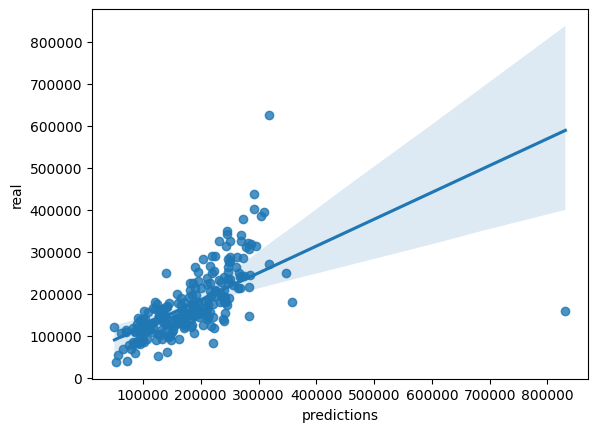

In [30]:
sns.regplot(x="predictions", y="real", data=predictions, )

<Axes: xlabel='predictions', ylabel='real'>

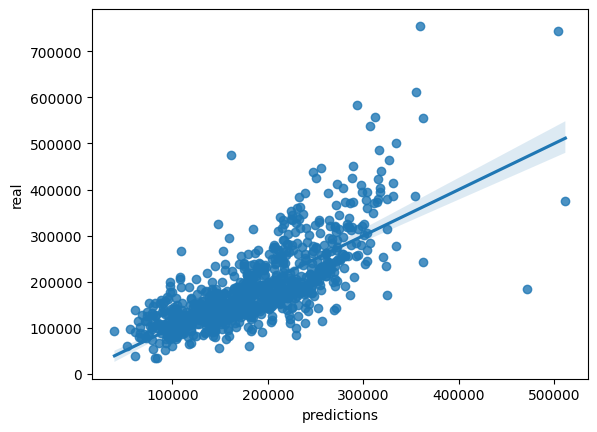

In [31]:
train = pd.DataFrame({
    "predictions":lr.predict(X_train),
    "real" : y_train
})
sns.regplot(x="predictions", y="real", data=train, )

In [32]:
r2_score( y_train, lr.predict(X_train),)


0.562335792509933

In [33]:
mean_squared_error(y_train, lr.predict(X_train),)**0.5


55997.91319749281